In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from keras.layers import *
import os, cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### 1. Prepare the data

In [8]:
dataset_path = "E:/FPT/AIL/Flower_classification/project/"
flower_list = os.listdir(dataset_path)

X = []  # List to store the image data
Y = []  # List to store the corresponding labels

for label, species_folder in enumerate(flower_list):
    species_path = os.path.join(dataset_path, species_folder)
    images = os.listdir(species_path)
    for image_name in images:
        image_path = os.path.join(species_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224))
        # Perform any necessary preprocessing on the image
        X.append(image)
        Y.append(label)

X = np.array(X)
Y = np.array(Y)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
print("Labels for each spiece:")
for count, name in enumerate(flower_list):
    print(f'{count} - {name}')

Labels for each spiece:
0 - astilbe
1 - bellflower
2 - black_eyed_susan
3 - calendula
4 - california_poppy
5 - carnation
6 - common_daisy
7 - coreopsis
8 - daffodil
9 - dandelion
10 - iris
11 - magnolia
12 - rose
13 - sunflower
14 - tulip
15 - water_lily


In [12]:
# Process Y_train to fit the model
y_train = tf.keras.utils.to_categorical(Y_train, num_classes=len(flower_list))

15


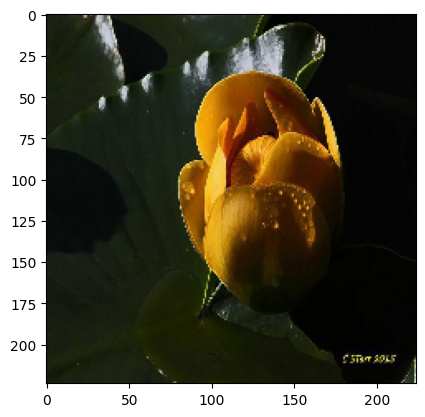

In [20]:
i = 2003
plt.imshow(X_train[i])
print(Y_train[i])

### 2. Building model

In [24]:
# Tạo mô hình VGG16 với trọng số đã được huấn luyện trước
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Đóng băng các layers của mô hình VGG16 để không được huấn luyện lại
for layer in base_model.layers:
    layer.trainable = False

# Tạo mô hình mới
model = Sequential()

# Thêm mô hình VGG16 vào mô hình mới
model.add(base_model)

# Thêm các layer phân loại mới
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation="relu"))
model.add(Dense(16, activation='softmax'))


In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               6422784   
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 16)                4112      
                                                                 
Total params: 21,207,376
Trainable params: 6,492,688
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train)

394/394 [==============================] - 1277s 3s/step - loss: 2.2655 - accuracy: 0.6849


### 3. Evaluating the model

In [28]:
y_pred = model.predict(X_test)

99/99 [==============================] - 391s 4s/step


The predicted value: 10 - The actual value: 10


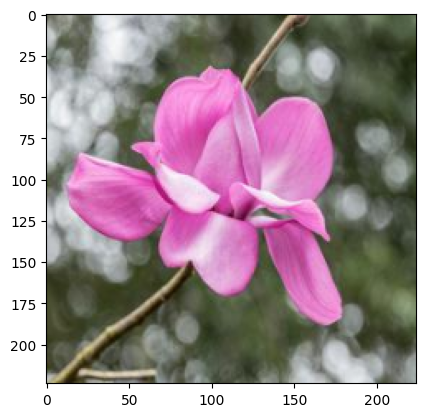

In [42]:
a = 502
max_pred = np.argmax(y_pred[a])
print(f"The predicted value: {max_pred} - The actual value: {Y_test[a]}")
plt.imshow(X_train[a])

The predicted value: 5 - The actual value: 5


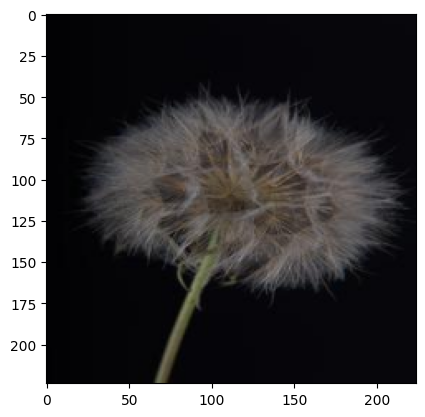

In [44]:
b = 127
max_pred = np.argmax(y_pred[b])
print(f"The predicted value: {max_pred} - The actual value: {Y_test[b]}")
plt.imshow(X_train[b])

The predict value: 11 - The actual value: 11


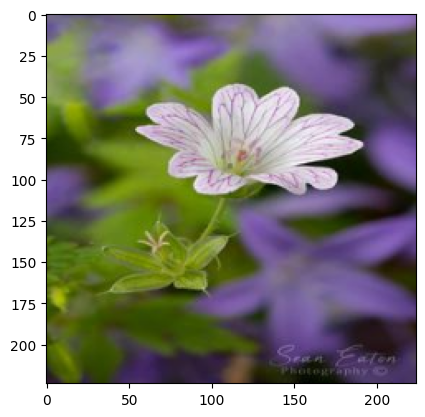

In [48]:
c = 2000
max_pred = np.argmax(y_pred[c])
print(f"The predict value: {max_pred} - The actual value: {Y_test[c]}")
plt.imshow(X_train[c])